import all file from the library

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [24]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [25]:
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

LET US TRAIN THE DATA FOR OUR MODEL

In [26]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica' # Setting the classes as either virginica (1) or Non-Virginica (0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [27]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

WE CAN PREDIT THE LABEL FOR ALL DATA NOW

In [28]:
y_pred = log_reg.predict(X_test)
y_pred

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

In [29]:
y_test

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False])

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall",recall)

Accuracy: 1.0
Precision: 1.0
Recall 1.0


CROSS VALIDATION TO GET OUR ACURACY

In [31]:
cross_val_scores = cross_val_score(log_reg, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())
print("Standard deviation:", cross_val_scores.std())

Cross-validation scores: [0.91666667 0.95833333 1.         0.91666667 1.        ]
Mean accuracy: 0.9583333333333333
Standard deviation: 0.03726779962499651


PREDICTION OF THE VALUE

In [32]:
conf_matr = confusion_matrix(y_test, y_pred)
conf_matr

array([[19,  0],
       [ 0, 11]], dtype=int64)

In [33]:
y_cross_pred = cross_val_predict(log_reg, X_test, y_test, cv=5)
cross_conf_matr = confusion_matrix(y_test, y_cross_pred)
print("Confusion Matrix:", cross_conf_matr)

Confusion Matrix: [[18  1]
 [ 1 10]]


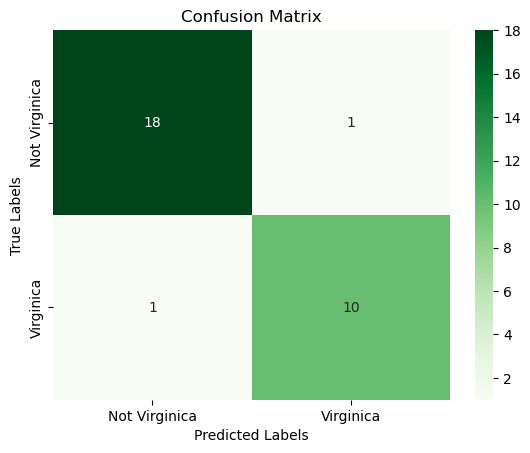

In [34]:
class_labels = ["Not Virginica", "Virginica"]

sns.heatmap(cross_conf_matr, annot=True, cmap="Greens", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

1.26 instances were accurately categorised as "not virginica" in true negatives.
2.12 occurrences were correctly identified as "virginica" in true positive cases.
3.0 instances were wrongly categorised as "virginica" in false positives.
4.False negatives: One case was wrongly labelled as "not virginica"
5.The model's predictions for each class can be analysed using the confusion matrix.
6.It gives a breakdown of the right and wrong forecasts.
7.determines how well the model can categorise instances.
8.discovers erroneous positive or false negative categorization patterns.